In [1]:
#Reference: https://nsamrao.github.io/Airbnb/


######################### house keeping ########################
import numpy as np
import pandas as pd

import seaborn as sb
import os

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

# to plot figures
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt


# directory
PROJECT_ROOT_DIR = "C:\Users\Sweta\Documents\Data Science Programming\Project1"
DATA_DIR = os.path.join(PROJECT_ROOT_DIR,"Data") 


### read & clean data

In [2]:
# read data
chicago_raw = pd.read_csv(os.path.join(DATA_DIR,"Chicago.csv"),encoding = "ISO-8859-1") 
# Clean datasets to include a limited number of variables
col_include = ['market','id','last_scraped','host_id','neighbourhood','zipcode','latitude','longitude',
               'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price',
               'weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people',
               'minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365',
               'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
               'review_scores_checkin','review_scores_communication','review_scores_location',
               'cancellation_policy','reviews_per_month']

chicago = chicago_raw.loc[:,col_include]
chicago['location'] = 'chicago'

chicago.head()

,market,id,last_scraped,host_id,neighbourhood,zipcode,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,cancellation_policy,reviews_per_month,location
0,Chicago,13824783,5/10/2017,55020055,Lincoln Square,60625,41.976546,-87.684934,House,Private room,...,25,99.0,10.0,10.0,10.0,10.0,10.0,moderate,2.57,chicago
1,Chicago,16740225,5/10/2017,36722941,NaN,60625,41.976522,-87.688755,Condominium,Private room,...,0,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,chicago
2,Chicago,18125245,5/10/2017,51669215,Lincoln Square,60625,41.972145,-87.699125,Townhouse,Private room,...,4,95.0,10.0,10.0,10.0,10.0,10.0,moderate,4.00,chicago
3,Chicago,8362570,5/10/2017,32837114,Lincoln Square,60625,41.971007,-87.688130,Condominium,Private room,...,12,98.0,10.0,10.0,10.0,10.0,10.0,flexible,0.87,chicago
4,Chicago,789867,5/10/2017,2782694,Lincoln Square,60640,41.964132,-87.675951,Apartment,Private room,...,96,94.0,9.0,9.0,10.0,10.0,10.0,strict,1.96,chicago


In [3]:
chicago.shape

(5207, 38)

In [4]:
chicago.dtypes

market                          object
id                               int64
last_scraped                    object
host_id                          int64
neighbourhood                   object
zipcode                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                           object
weekly_price                    object
monthly_price                   object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
minimum_nights                   int64
maximum_nights                   int64
availability_30                  int64
availability_60          

In [5]:
# change some variables of interest to numeric
def change_price_format(dat):
    col_price = ['price']
    for col_name3 in col_price:
        dat[col_name3] = dat[col_name3].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True) #https://nsamrao.github.io/Airbnb/
        return dat

def change_var_type(dat):
    col_categorical = ['neighbourhood','zipcode','property_type','room_type',
1                       'bed_type','cancellation_policy','location']
    for col_name in col_categorical:
        dat[col_name] = dat[col_name].astype('category') #https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe 
    col_numeric = ['accommodates','bathrooms','bedrooms','beds','guests_included',
                   'minimum_nights','maximum_nights','availability_30','availability_60',
                   'availability_90','availability_365','number_of_reviews','reviews_per_month',
                   'price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                   'review_scores_checkin','review_scores_communication','review_scores_location',
                   'price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
    for col_name2 in col_numeric:
        dat[col_name2] = dat[col_name2].apply(pd.to_numeric, errors='coerce') #https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
    return dat

chicago = change_price_format(chicago)
chicago = change_var_type(chicago)
chicago.dtypes

market                           object
id                                int64
last_scraped                     object
host_id                           int64
neighbourhood                  category
zipcode                        category
latitude                        float64
longitude                       float64
property_type                  category
room_type                      category
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                       category
price                           float64
weekly_price                    float64
monthly_price                   float64
security_deposit                float64
cleaning_fee                    float64
guests_included                   int64
extra_people                    float64
minimum_nights                    int64
maximum_nights                    int64
availability_30                   int64


### descriptives

In [6]:
def get_freq_cat(dat):
    col_freq_cat = ['property_type','room_type','bed_type','cancellation_policy']
    for x in col_freq_cat:
        print() #blank line  between each section
        print(x)
        print(dat[x].value_counts())

def get_freq_int(dat):
    col_freq_int =['accommodates','bathrooms','bedrooms','beds','guests_included',
                   'minimum_nights','maximum_nights','availability_30','availability_60',
                   'availability_90','availability_365','number_of_reviews']
    for x in col_freq_int:
        print()
        print(x)
        print(dat[x].value_counts())
        
def get_descriptive(dat):
    col_mean = ['accommodates','bathrooms','bedrooms','beds','guests_included',
                   'minimum_nights','maximum_nights','availability_30','availability_60',
                   'availability_90','availability_365','number_of_reviews',
                   'price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                   'review_scores_checkin','review_scores_communication',
                   'review_scores_location','reviews_per_month']
    dat_stats = pd.DataFrame(columns = ['varname','mean','sd','median','min','max']) #create empty dataframe    
    dat_stats['varname'] = list(col_mean)
    dat_stats = dat_stats.set_index('varname')
    for col_name in col_mean:
        dat_stats.loc[col_name,'mean'] = dat[col_name].mean()
        dat_stats.loc[col_name,'sd'] = dat[col_name].std()
        dat_stats.loc[col_name,'median'] = dat[col_name].median()
        dat_stats.loc[col_name,'min'] = dat[col_name].min()
        dat_stats.loc[col_name,'max'] = dat[col_name].max()
    return dat_stats

Descriptive statistics

In [7]:
#get_freq_cat(chicago)
#get_freq_int(chicago)
chicago_stats = get_descriptive(chicago)
#chicago_stats['location']='Chicago'
chicago_stats

,mean,sd,median,min,max
varname,,,,,
accommodates,3.79931,2.5118,3,1,16
bathrooms,1.28754,0.575582,1,0,8
bedrooms,1.44276,0.91675,1,0,10
beds,1.91295,1.36128,1,1,16
guests_included,1.84828,1.47642,1,1,15
minimum_nights,3.40772,11.5814,2,1,365
maximum_nights,413167,2.97602e+07,1125,1,2147483647
availability_30,10.4152,9.11977,9,0,30
availability_60,24.7617,18.7353,23,0,60


### correlation matrix for airbnb data 

In [8]:
# get pearson correlation and pvalues
# https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance/41406291
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

# add stars to indicate significance level (1 star for p < .05)
def add_sig_level(rho, pvalues):
    r0 = rho.applymap(lambda x : '{:.2f}'.format(x)) # for formatting "{:.2f}".format() to output 2 decimals 
    r1 = rho.applymap(lambda x: '{:.2f}*'.format(x)) # see formatting: https://mkaz.blog/code/python-string-format-cookbook/
    r2 = rho.applymap(lambda x: '{:.2f}**'.format(x))
    r3 = rho.applymap(lambda x: '{:.2f}***'.format(x)) #.applymap() apply a function to a DataFrame that is intended to operate elementwise
    rho = rho.mask(pvalues>=0.05,r0) # .mask() if-then function: for each element in the calling DataFrame, if cond is False the element is used; otherwise the corresponding element from the DataFrame other is used.
    rho = rho.mask(pvalues<0.05,r1)
    rho = rho.mask(pvalues<0.01,r2)
    rho = rho.mask(pvalues<0.001,r3)
    return rho

In [9]:
chicago_col_cor = ['price','accommodates','bathrooms','availability_30','availability_60','availability_90','availability_365','number_of_reviews',
           'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','reviews_per_month']
chicago_rho = chicago[chicago_col_cor].corr()
chicago_pval = calculate_pvalues(chicago[chicago_col_cor])
add_sig_level(chicago_rho,chicago_pval)

,price,accommodates,bathrooms,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
price,1.00***,0.56***,0.45***,0.13***,0.11***,0.11***,0.06***,-0.12***,0.06***,0.02,0.08***,0.02,-0.01,0.17***,-0.18***
accommodates,0.56***,1.00***,0.47***,0.06**,0.04,0.05*,0.10***,-0.00,-0.05***,-0.02,0.01,-0.02,-0.05***,-0.02,0.02
bathrooms,0.45***,0.47***,1.00***,0.05*,0.03,0.03,0.07***,-0.05***,0.00,-0.02,0.00,-0.01,-0.04**,-0.02,-0.07***
availability_30,0.13***,0.06**,0.05*,1.00***,0.91***,0.84***,0.49***,-0.10***,-0.12***,-0.13***,-0.05***,-0.09***,-0.10***,-0.09***,-0.19***
availability_60,0.11***,0.04,0.03,0.91***,1.00***,0.96***,0.53***,-0.07***,-0.13***,-0.13***,-0.07***,-0.08***,-0.10***,-0.10***,-0.15***
availability_90,0.11***,0.05*,0.03,0.84***,0.96***,1.00***,0.54***,-0.04,-0.13***,-0.12***,-0.07***,-0.08***,-0.09***,-0.09***,-0.11***
availability_365,0.06***,0.10***,0.07***,0.49***,0.53***,0.54***,1.00***,0.12***,-0.11***,-0.10***,-0.05***,-0.09***,-0.07***,-0.13***,-0.04**
number_of_reviews,-0.12***,-0.00,-0.05***,-0.10***,-0.07***,-0.04,0.12***,1.00***,-0.02,0.02,0.00,0.05**,0.04**,-0.05***,0.54***
review_scores_rating,0.06***,-0.05***,0.00,-0.12***,-0.13***,-0.13***,-0.11***,-0.02,1.00***,0.71***,0.70***,0.55***,0.55***,0.46***,0.03
review_scores_accuracy,0.02,-0.02,-0.02,-0.13***,-0.13***,-0.12***,-0.10***,0.02,0.71***,1.00***,0.59***,0.53***,0.48***,0.38***,0.09***


### Graphs 

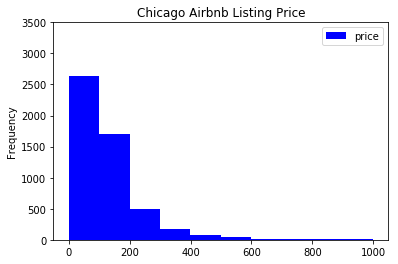

In [10]:
# plot price distribution
chicago.plot(kind='hist',y='price',color="Blue",title="Chicago Airbnb Listing Price")
plt.ylim(0,3500)
plt.show()

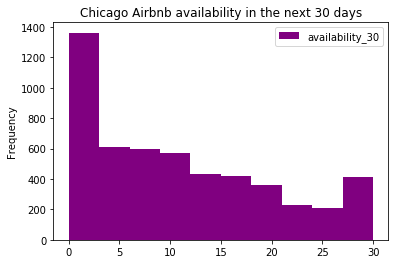

In [11]:
chicago.plot(kind='hist',y='availability_30',color="Purple",title="Chicago Airbnb availability in the next 30 days")
plt.show()

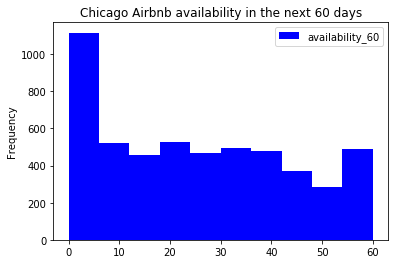

In [12]:
chicago.plot(kind='hist',y='availability_60',color="B",title="Chicago Airbnb availability in the next 60 days")
plt.show()

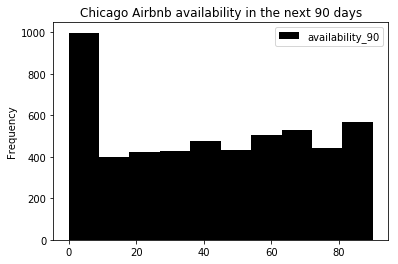

In [13]:
chicago.plot(kind='hist',y='availability_90',color="Black",title="Chicago Airbnb availability in the next 90 days")
plt.show()

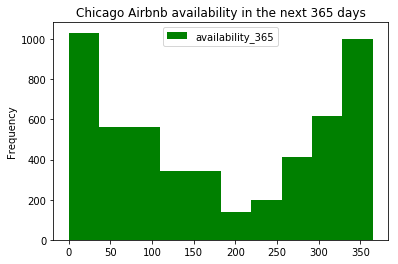

In [14]:
chicago.plot(kind='hist',y='availability_365',color="G",title="Chicago Airbnb availability in the next 365 days")
plt.show()

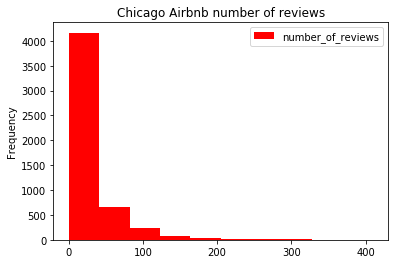

In [15]:
chicago.plot(kind='hist',y='number_of_reviews',color="R",title="Chicago Airbnb number of reviews")
plt.show()

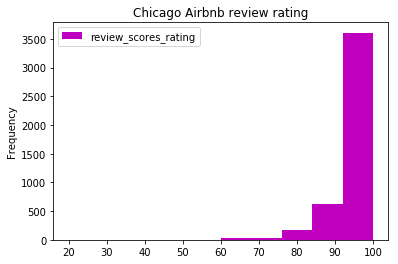

In [16]:
chicago.plot(kind='hist',y='review_scores_rating',color="M",title="Chicago Airbnb review rating")
plt.show()

##### plot of price at different locations

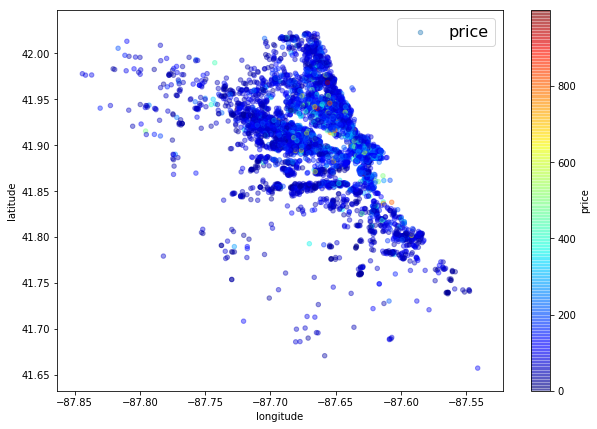

In [17]:
# plot price by location (longitude and latitude)

chicago.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,label="price", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
plt.legend(fontsize=16)


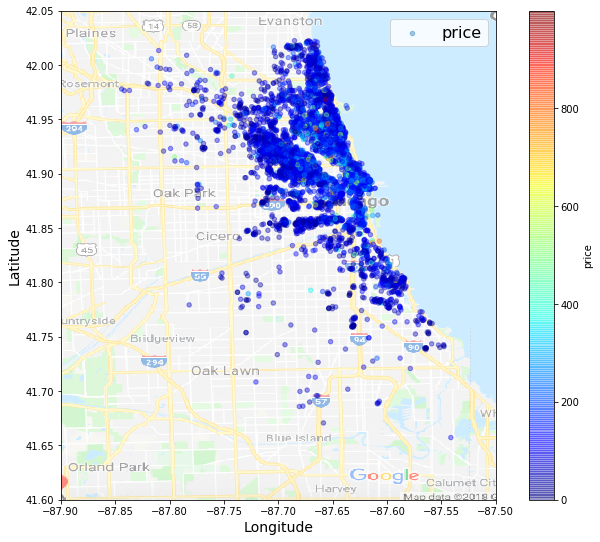

In [21]:
# the picture is from google maps
import matplotlib.image as mpimg
chicago_img=mpimg.imread(PROJECT_ROOT_DIR + '/chicago.png')

priceplot = chicago.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,label="price", figsize=(12,9),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
plt.imshow(chicago_img, extent=[-87.90, -87.50, 41.60, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

#### plot of availability in the next 90 days at different locations

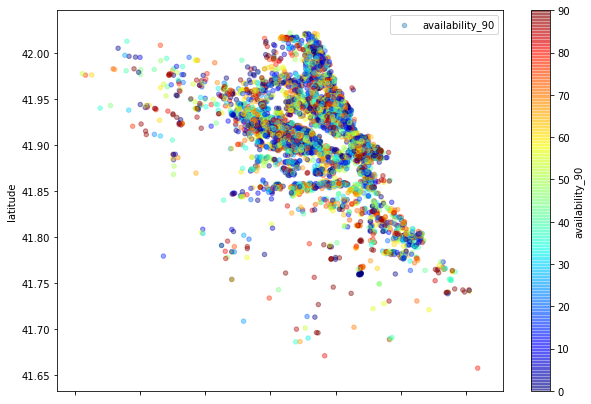

In [22]:
chicago.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            label="availability_90", figsize=(10,7), c="availability_90", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

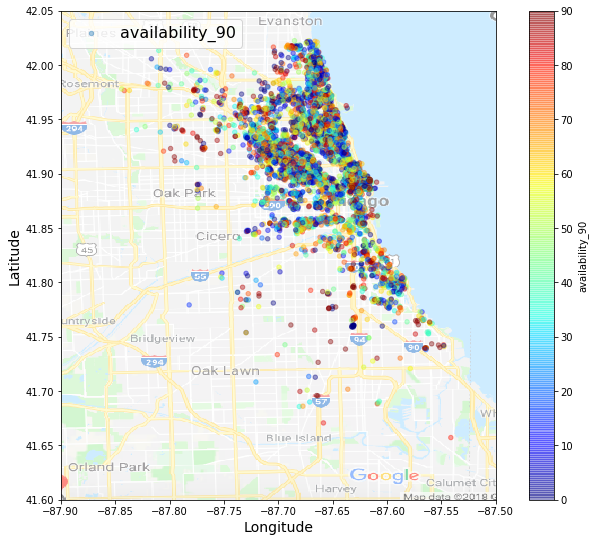

In [23]:
chicago_img=mpimg.imread(PROJECT_ROOT_DIR + '/chicago.png')

avail365plot = chicago.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,label="availability_90", figsize=(12,9),
    c="availability_90", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
plt.imshow(chicago_img, extent=[-87.90, -87.50, 41.60, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

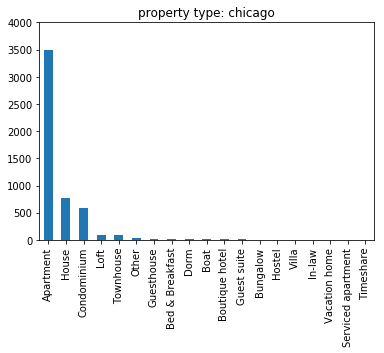

In [24]:
chicago['property_type'].value_counts().plot(kind='bar')
plt.title("property type: chicago")
plt.ylim(0,4000)
plt.show()


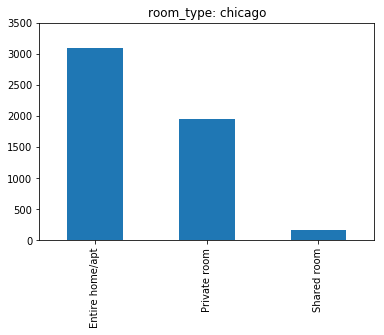

In [25]:
chicago['room_type'].value_counts().plot(kind='bar')
plt.title("room_type: chicago")
plt.ylim(0,3500)
plt.show()

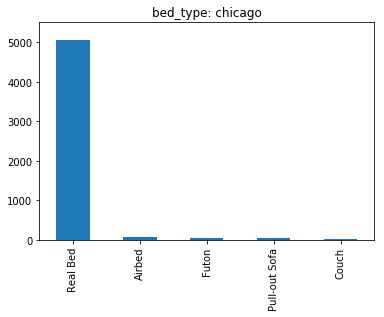

In [26]:
chicago['bed_type'].value_counts().plot(kind='bar')
plt.title("bed_type: chicago")
plt.ylim(0,5500)
plt.show()

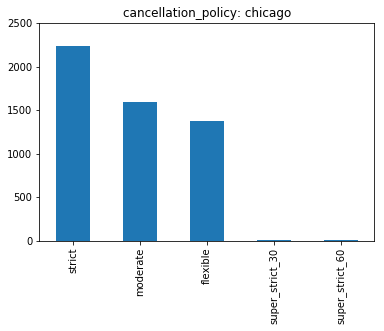

In [27]:
chicago['cancellation_policy'].value_counts().plot(kind='bar')
plt.title("cancellation_policy: chicago")
plt.ylim(0,2500)
plt.show()

### Merge Airbnb data with Zillow data

In [28]:
#Creating a dataframe for Chicago Airbnb data & setting zipcode as index
#ref: https://nsamrao.github.io/Airbnb/
df_abnb = pd.DataFrame(chicago)
df_abnb.head()
df_abnb.set_index('zipcode')#.dropna(axis=0)

,market,id,last_scraped,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,cancellation_policy,reviews_per_month,location
zipcode,,,,,,,,,,,,,,,,,,,,,
60625,Chicago,13824783,5/10/2017,55020055,Lincoln Square,41.976546,-87.684934,House,Private room,4,...,25,99.0,10.0,10.0,10.0,10.0,10.0,moderate,2.57,chicago
60625,Chicago,16740225,5/10/2017,36722941,NaN,41.976522,-87.688755,Condominium,Private room,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,chicago
60625,Chicago,18125245,5/10/2017,51669215,Lincoln Square,41.972145,-87.699125,Townhouse,Private room,6,...,4,95.0,10.0,10.0,10.0,10.0,10.0,moderate,4.00,chicago
60625,Chicago,8362570,5/10/2017,32837114,Lincoln Square,41.971007,-87.688130,Condominium,Private room,2,...,12,98.0,10.0,10.0,10.0,10.0,10.0,flexible,0.87,chicago
60640,Chicago,789867,5/10/2017,2782694,Lincoln Square,41.964132,-87.675951,Apartment,Private room,3,...,96,94.0,9.0,9.0,10.0,10.0,10.0,strict,1.96,chicago
60625,Chicago,16701336,5/10/2017,36722941,Lincoln Square,41.976453,-87.689971,Condominium,Private room,2,...,1,100.0,10.0,10.0,10.0,10.0,10.0,strict,0.28,chicago
60640,Chicago,8148031,5/10/2017,43018961,Lincoln Square,41.968436,-87.677514,Apartment,Private room,2,...,5,100.0,10.0,10.0,10.0,10.0,10.0,flexible,0.92,chicago
60625,Chicago,6713059,5/10/2017,2441740,NaN,41.967479,-87.691859,Apartment,Private room,1,...,14,97.0,10.0,10.0,10.0,10.0,10.0,flexible,0.63,chicago
60625,Chicago,17620535,5/10/2017,756599,NaN,41.966686,-87.688415,Apartment,Entire home/apt,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,chicago


In [29]:
#Reading Zillow Home Data and creating dataFrame with Zillow Feature: Zillow Home Value Index
#ref: https://nsamrao.github.io/Airbnb/ 
ZHVI = pd.read_csv(os.path.join(DATA_DIR,'Zip_Zhvi_Summary_AllHomes.csv')).set_index('RegionName')
ZHVI = ZHVI.iloc[:,[7,11,12]]

df_homes = pd.DataFrame(ZHVI)
df_homes.head()


,Zhvi,5Year,10Year
RegionName,,,
10025,1212500,0.090261,0.047931
60657,319700,0.035369,-0.000872
60614,394800,0.046529,-0.000430
79936,114800,0.001927,-0.012509
60640,210000,0.048273,-0.010721


In [30]:
#Merging on zip code
#Refered: https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
df1 = pd.merge(df_abnb, df_homes, left_index = True, right_index = True)
df1

,market,id,last_scraped,host_id,neighbourhood,zipcode,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,cancellation_policy,reviews_per_month,location,Zhvi,5Year,10Year
1001,Chicago,3302759,5/10/2017,16680094,Ukrainian Village,60622,41.899859,-87.680303,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,strict,1.93,chicago,203900,0.031041,-0.001218
1002,Chicago,802613,5/10/2017,1500490,Humboldt Park,60622,41.900268,-87.697635,Apartment,Private room,...,9.0,10.0,10.0,9.0,strict,1.00,chicago,322200,0.026067,0.001344
1005,Chicago,15662480,5/10/2017,55139736,NaN,60612,41.894191,-87.678570,Apartment,Private room,...,9.0,10.0,9.0,10.0,moderate,1.55,chicago,224600,0.056664,0.003541
1007,Chicago,71930,5/10/2017,334241,Ukrainian Village,60622,41.896866,-87.679889,Apartment,Private room,...,9.0,10.0,10.0,10.0,moderate,0.50,chicago,264500,0.024544,0.002142
1008,Chicago,15022766,5/10/2017,20623984,River West,60654,41.893161,-87.648160,Apartment,Entire home/apt,...,10.0,10.0,10.0,9.0,strict,2.05,chicago,227300,0.017124,0.003589
1010,Chicago,11591192,5/10/2017,10125923,Wicker Park,60622,41.906952,-87.683941,House,Private room,...,10.0,10.0,10.0,10.0,flexible,0.29,chicago,245200,0.016442,-0.001215
1011,Chicago,17637703,5/10/2017,28628238,Wicker Park,60622,41.907999,-87.671290,Apartment,Entire home/apt,...,8.0,10.0,10.0,10.0,flexible,1.00,chicago,174100,0.029836,-0.001538
1013,Chicago,15496152,5/10/2017,45828803,West Town/Noble Square,60642,41.900631,-87.663158,Loft,Entire home/apt,...,10.0,10.0,10.0,10.0,strict,0.97,chicago,175600,0.036901,0.002307
1020,Chicago,16392656,5/10/2017,74359802,Humboldt Park,60622,41.898243,-87.693878,Apartment,Entire home/apt,...,10.0,10.0,10.0,10.0,moderate,4.11,chicago,184200,0.030250,0.001367
1022,Chicago,7044056,5/10/2017,36865855,NaN,60622,41.894909,-87.668108,House,Private room,...,10.0,10.0,10.0,10.0,strict,0.76,chicago,114300,0.025660,-0.014145


##### plot of Airbnb listing price and Zhvi at different locations

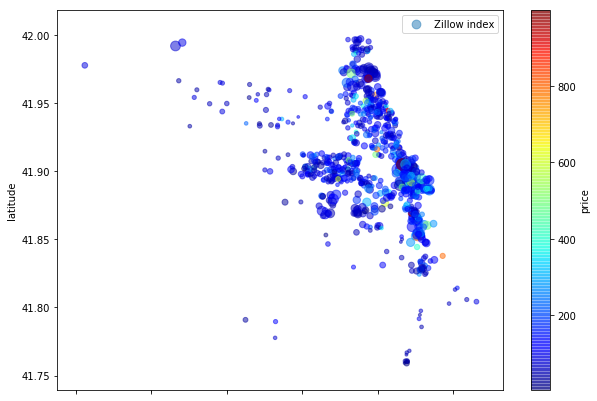

In [31]:
#Scatter plot for longitude and latitude with Airbnb listing price and Zhvi
##Ref: Hands-on Machine Learning with Scikit Learn & TensorFlow Textbook, Chap 2
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
         s=df1["Zhvi"]/10000 , label="Zillow index", figsize=(10,7),
         c="price",cmap=plt.get_cmap("jet"), colorbar =True,
        )
plt.legend()

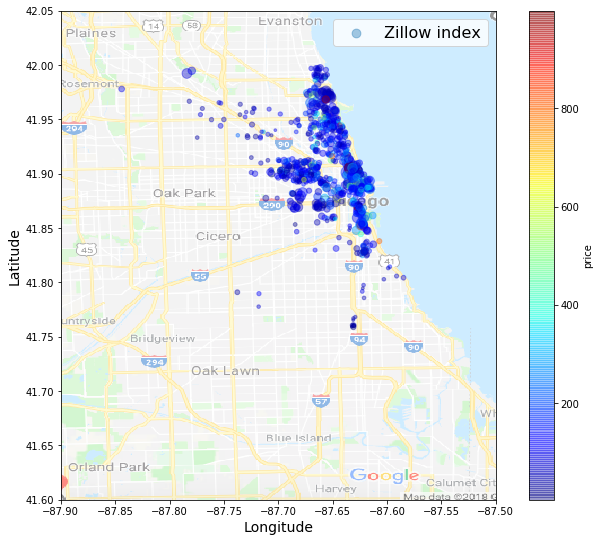

In [32]:
chicago_img=mpimg.imread(PROJECT_ROOT_DIR + '/chicago.png')

scatterplot = df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,label="Zillow index", figsize=(12,9),
    s=df1["Zhvi"]/10000 , c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.imshow(chicago_img, extent=[-87.90, -87.50, 41.60, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

In [33]:
### correlation matrix for airbnb & zillow data 

In [34]:
df_col_cor = ['Zhvi','5Year','10Year'] + chicago_col_cor
df1_rho = df1[df_col_cor].corr()
df1_pval = calculate_pvalues(df1[df_col_cor])
add_sig_level(df1_rho,df1_pval)

,Zhvi,5Year,10Year,price,accommodates,bathrooms,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
Zhvi,1.00***,0.42***,0.66***,0.10**,-0.00,0.01,0.02,0.01,-0.00,-0.02,-0.01,0.02,0.03,0.02,-0.07*,-0.03,0.06,0.06
5Year,0.42***,1.00***,0.68***,0.10*,-0.04,-0.01,-0.02,-0.03,-0.03,-0.03,-0.06,0.02,0.00,0.03,-0.02,-0.00,0.06,0.02
10Year,0.66***,0.68***,1.00***,0.05,-0.06*,-0.04,0.00,-0.03,-0.04,-0.06*,0.00,0.02,0.04,0.03,-0.03,-0.00,-0.03,0.03
price,0.10**,0.10*,0.05,1.00***,0.56***,0.48***,0.18***,0.17***,0.17***,0.09***,-0.13**,0.01,-0.04,0.05,-0.07,-0.10**,0.08*,-0.15***
accommodates,-0.00,-0.04,-0.06*,0.56***,1.00***,0.57***,0.03,0.03,0.04,0.11***,-0.00,-0.07,-0.05,-0.01,-0.04,-0.11**,-0.05,0.06
bathrooms,0.01,-0.01,-0.04,0.48***,0.57***,1.00***,0.01,0.00,0.00,0.04,-0.07,-0.03,-0.05,-0.02,-0.05,-0.11***,-0.00,-0.06
availability_30,0.02,-0.02,0.00,0.18***,0.03,0.01,1.00***,0.91***,0.83***,0.52***,-0.09*,-0.08*,-0.11**,0.03,-0.08,-0.09*,-0.11**,-0.23***
availability_60,0.01,-0.03,-0.03,0.17***,0.03,0.00,0.91***,1.00***,0.96***,0.55***,-0.05,-0.11**,-0.12**,-0.01,-0.07,-0.10*,-0.13**,-0.19***
availability_90,-0.00,-0.03,-0.04,0.17***,0.04,0.00,0.83***,0.96***,1.00***,0.55***,-0.02,-0.08*,-0.09,0.01,-0.05,-0.07,-0.12**,-0.13**
availability_365,-0.02,-0.03,-0.06*,0.09***,0.11***,0.04,0.52***,0.55***,0.55***,1.00***,0.15***,-0.05,-0.06,-0.00,-0.03,-0.05,-0.09*,-0.06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cf09da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1d0ccdd8>]], dtype=object)

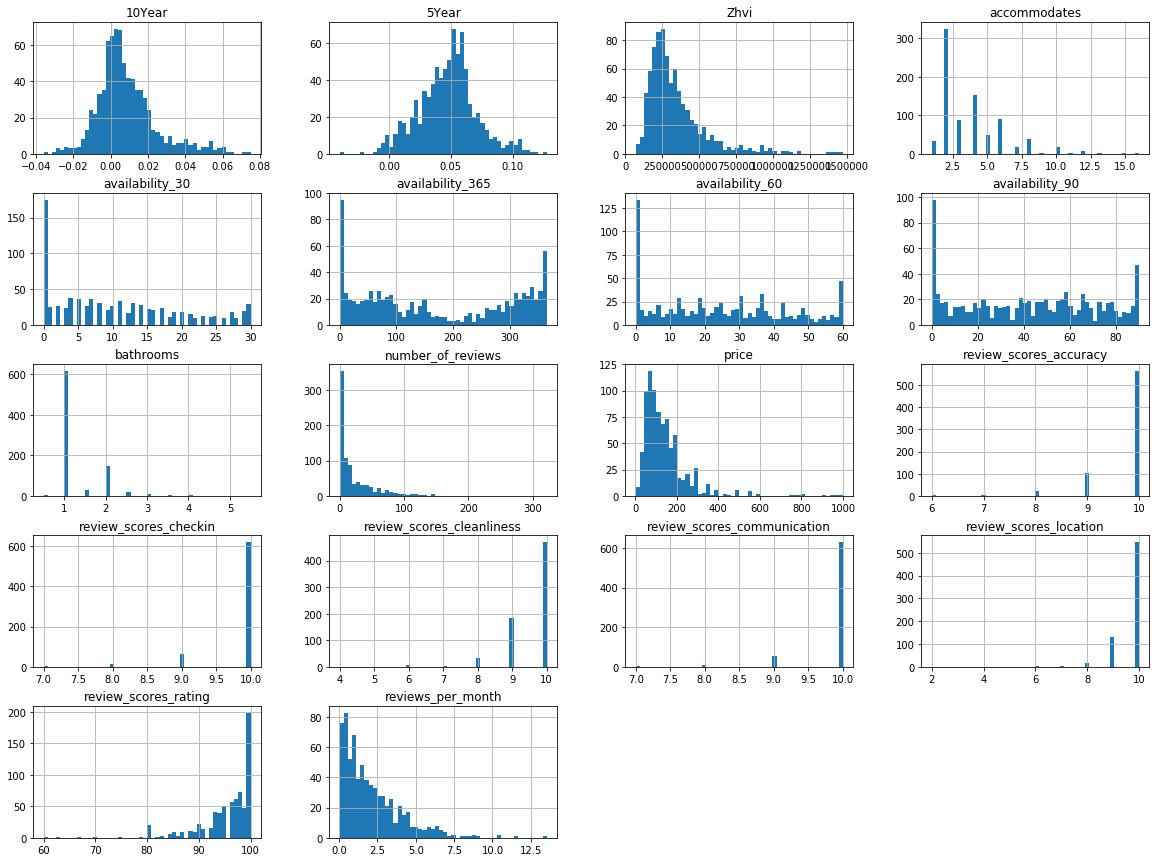

In [35]:
df1[df_col_cor].hist(bins=50, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d18e940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f3a1358>]], dtype=object)

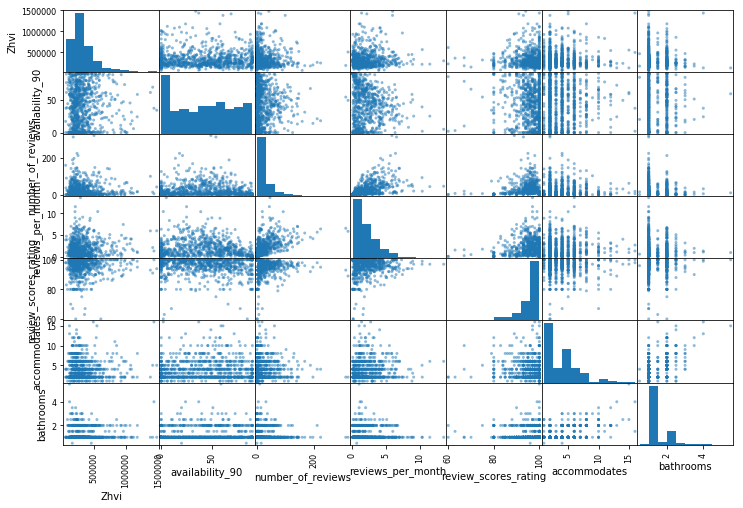

In [36]:
#Scatter matrix to check the correlation of price with other Housing variables
##Ref: Hands-on Machine Learning with Scikit Learn & TensorFlow Textbook, Chap 2
from pandas.plotting import scatter_matrix

attributes = ['Zhvi','availability_90','number_of_reviews','reviews_per_month','review_scores_rating','accommodates','bathrooms']
scatter_matrix(df1[attributes],figsize=(12,8))

### Prepare for the traning set

In [37]:
from sklearn.model_selection import train_test_split 

col=['Zhvi','10Year', '5Year','price','accommodates','bathrooms','availability_30','availability_60','availability_90','availability_365','number_of_reviews',
           'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','reviews_per_month']

df1 = df1[col]
train_set, test_set = train_test_split(df1,test_size=0.2,random_state=42) #we are splitting data in the ratior 80:20

print(len(train_set), "train +", len(test_set), "test")

666 train + 167 test


In [38]:
train_rho = train_set.corr()
train_pval = calculate_pvalues(train_set)
add_sig_level(train_rho,train_pval)

,Zhvi,10Year,5Year,price,accommodates,bathrooms,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
Zhvi,1.00***,0.65***,0.41***,0.10**,-0.01,0.00,0.02,-0.00,-0.01,-0.02,-0.02,0.00,0.02,0.00,-0.09*,-0.06,0.06,0.07
10Year,0.65***,1.00***,0.69***,0.04,-0.08*,-0.04,0.02,-0.02,-0.03,-0.07*,-0.00,0.02,0.04,0.02,-0.05,-0.01,-0.05,0.04
5Year,0.41***,0.69***,1.00***,0.07,-0.07,-0.01,-0.01,-0.03,-0.03,-0.05,-0.06,0.01,0.00,0.02,-0.04,-0.00,0.03,0.01
price,0.10**,0.04,0.07,1.00***,0.53***,0.51***,0.19***,0.18**,0.17**,0.05*,-0.14**,0.03,-0.02,0.07,-0.05,-0.10*,0.07,-0.18***
accommodates,-0.01,-0.08*,-0.07,0.53***,1.00***,0.59***,0.05,0.04,0.04,0.10**,-0.01,-0.05,-0.02,-0.00,-0.02,-0.10*,-0.05,0.04
bathrooms,0.00,-0.04,-0.01,0.51***,0.59***,1.00***,-0.01,-0.01,-0.01,0.02,-0.07,0.01,-0.00,0.02,-0.02,-0.09*,0.01,-0.06
availability_30,0.02,0.02,-0.01,0.19***,0.05,-0.01,1.00***,0.91***,0.82***,0.52***,-0.10*,-0.07,-0.11*,0.03,-0.08,-0.05,-0.11*,-0.26***
availability_60,-0.00,-0.02,-0.03,0.18**,0.04,-0.01,0.91***,1.00***,0.96***,0.54***,-0.05,-0.10*,-0.14**,-0.01,-0.06,-0.07,-0.13**,-0.20***
availability_90,-0.01,-0.03,-0.03,0.17**,0.04,-0.01,0.82***,0.96***,1.00***,0.55***,-0.01,-0.07,-0.09,0.02,-0.05,-0.03,-0.11*,-0.15**
availability_365,-0.02,-0.07*,-0.05,0.05*,0.10**,0.02,0.52***,0.54***,0.55***,1.00***,0.16***,-0.03,-0.04,-0.02,-0.02,-0.00,-0.10*,-0.03


In [39]:
# deal with missing data

from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

#train_missing = train_set[train_set.isnull().any(axis=1)]
train_set[train_set.isnull().any(axis=1)].shape

(127, 18)

In [40]:
imputer.fit(train_set)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [41]:
imputer.statistics_

array([  2.87400000e+05,   5.14670900e-03,   4.92294825e-02,
         1.19000000e+02,   3.00000000e+00,   1.00000000e+00,
         8.00000000e+00,   2.30000000e+01,   4.30000000e+01,
         1.33000000e+02,   9.00000000e+00,   9.70000000e+01,
         1.00000000e+01,   1.00000000e+01,   1.00000000e+01,
         1.00000000e+01,   1.00000000e+01,   1.58000000e+00])

In [42]:
A = imputer.transform(train_set)
train_set_tr = pd.DataFrame(A, columns=train_set.columns)
train_set_tr.head()

,Zhvi,10Year,5Year,price,accommodates,bathrooms,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,318300.0,0.002226,0.057832,55.0,2.0,1.0,0.0,27.0,32.0,34.0,4.0,90.0,8.0,10.0,9.0,8.0,10.0,0.35
1,789600.0,0.049212,0.087003,211.0,6.0,1.0,7.0,16.0,25.0,93.0,22.0,91.0,9.0,10.0,10.0,9.0,10.0,2.73
2,292400.0,0.000721,0.061558,147.0,3.0,1.0,30.0,60.0,90.0,365.0,3.0,93.0,9.0,9.0,10.0,10.0,10.0,0.28
3,507800.0,0.025568,0.056656,99.0,2.0,1.0,3.0,13.0,39.0,65.0,108.0,94.0,10.0,10.0,10.0,10.0,10.0,6.12
4,341000.0,0.036790,0.098174,150.0,5.0,2.0,0.0,4.0,4.0,6.0,7.0,100.0,10.0,9.0,10.0,10.0,10.0,0.74


scalling training set
Zhvi is highly skewed and not on the same scale as other variables, need to be mean-centered and transformed
price is also highly skewed 


In [43]:
# ref code here:  http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html 
from sklearn import preprocessing 

# mean-centering 
train_set_tr['Zhvi'] = preprocessing.scale(train_set_tr['Zhvi'],copy=False, with_mean=True, with_std=True)

# log-transform all except Zhvi
#col_tr=['price','review_scores_rating','number_of_reviews','reviews_per_month']
#train_set_tr[col_tr] = train_set_tr[col_tr].apply(np.log)
# sqrt-transform Zhvi
#train_set_tr['Zhvi'] = train_set_tr['Zhvi'].apply(np.sqrt)
#train_set_tr['price'] = train_set_tr['price'].apply(np.sqrt)
## we tried log-transformation but got indifite values thus we only used mean-centering

deal with missing data and scalling test set

In [44]:
B = imputer.transform(test_set)
test_set_tr = pd.DataFrame(B, columns=test_set.columns)

test_set_tr['Zhvi'] = preprocessing.scale(test_set_tr['Zhvi'],copy=False, with_mean=True, with_std=True)
#test_set_tr[col_tr] = test_set_tr[col_tr].apply(np.log)
#sqrt-transform Zhvi
#test_set_tr['Zhvi'] = test_set_tr['Zhvi'].apply(np.sqrt)
#test_set_tr['price'] = test_set_tr['price'].apply(np.sqrt)

# model selection

In [45]:
#all the codes below: see Ref Hands-on Machine Learning with Scikit Learn & TensorFlow Textbook, Chap 2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

col_feature=['Zhvi','review_scores_rating','availability_90','number_of_reviews','reviews_per_month', 'accommodates','bathrooms']
IV_train = train_set_tr[col_feature]
DV_train = train_set_tr['price']

IV_test = test_set_tr[col_feature]
DV_test = test_set_tr['price']

### Linear Regression Model 
train model

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(IV_train, DV_train)

# intercept
print('intercept:', lin_reg.intercept_)
# regression coefficients
lin_reg_coef = pd.DataFrame(lin_reg.coef_).transpose()
lin_reg_coef.columns = IV_train.columns

lin_reg_coef = lin_reg_coef.transpose()
lin_reg_coef.columns = ['regression coeffient']
lin_reg_coef

intercept: -130.09483906


,regression coeffient
Zhvi,14.283299
review_scores_rating,1.358086
availability_90,0.623603
number_of_reviews,-0.142475
reviews_per_month,-8.691680
accommodates,18.849385
bathrooms,55.813742


In [47]:
#mean squared error
print("Mean squared error on training set: %.2f" % mean_squared_error(DV_train, lin_reg.predict(IV_train))) #https://nsamrao.github.io/Airbnb/
#RMSE
print("RMSE on training set: %.2f" % np.sqrt(mean_squared_error(DV_train, lin_reg.predict(IV_train))))

#variance explained
print("variance explained on training set: %.2f" % r2_score(DV_train, lin_reg.predict(IV_train)))

Mean squared error on training set: 9193.29
RMSE on training set: 95.88
variance explained on training set: 0.38


to fit test set

In [48]:
#mean squared error
print("Mean squared error on test set: %.2f" % mean_squared_error(DV_test, lin_reg.predict(IV_test)))
#RMSE
print("RMSE on test set: %.2f" % np.sqrt(mean_squared_error(DV_test, lin_reg.predict(IV_test))))

#variance explained
print("variance explained on test set: %.2f" % r2_score(DV_test, lin_reg.predict(IV_test)))

Mean squared error on test set: 6915.97
RMSE on test set: 83.16
variance explained on test set: 0.41


model evaluation using cross-validation

In [49]:
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    print("Scores:", scores)
    
lin_scores = cross_val_score(lin_reg, IV_train,DV_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Mean: 93.779720975
Standard deviation: 27.4417070479
Scores: [ 126.15955576   73.22551649   52.70773828  134.42175091   92.73098226
   77.95152405   76.61689769  123.29368568   65.04660211  115.64295651]


### DecisionTree 

In [50]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(IV_train, DV_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

fitting training set: overfitting

In [51]:
print("Mean squared error on train set: %.2f" % mean_squared_error(DV_train, tree_reg.predict(IV_train)))
print("RMSE on train set: %.2f" % np.sqrt(mean_squared_error(DV_train, tree_reg.predict(IV_train))))
print("variance explained on train set: %.2f" % r2_score(DV_train, tree_reg.predict(IV_train)))


Mean squared error on train set: 0.00
RMSE on train set: 0.00
variance explained on train set: 1.00


now let's fit test set

In [52]:
print("Mean squared error on test set: %.2f" % mean_squared_error(DV_test, tree_reg.predict(IV_test)))
print("RMSE on test set: %.2f" % np.sqrt(mean_squared_error(DV_test, tree_reg.predict(IV_test))))
print("variance explained on test set: %.2f" % r2_score(DV_test, tree_reg.predict(IV_test)))


Mean squared error on test set: 14185.79
RMSE on test set: 119.10
variance explained on test set: -0.21


model evaluation for decision tree using cross-validation:
decision-tree seems to perform worse than linear regression model

In [53]:
tree_scores = cross_val_score(tree_reg,  IV_train,DV_train,  scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Mean: 142.120446888
Standard deviation: 36.5605841709
Scores: [ 174.44402087  136.87078556   89.41993834  177.28209244  118.65382987
  118.37046576  137.78815536  207.04588863   94.13103375  167.19825829]


### Random Forest

In [54]:
forest_reg = RandomForestRegressor()
forest_reg.fit(IV_train,DV_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

fitting the training set

In [55]:
print("Mean squared error on train set: %.2f" % mean_squared_error(DV_train, forest_reg.predict(IV_train)))
print("RMSE on train set: %.2f" % np.sqrt(mean_squared_error(DV_train, forest_reg.predict(IV_train))))
print("variance explained on train set: %.2f" % r2_score(DV_train, forest_reg.predict(IV_train)))

Mean squared error on train set: 2193.94
RMSE on train set: 46.84
variance explained on train set: 0.85


fitting the test set

In [56]:
forest_predictions = forest_reg.predict(IV_test)
print("Mean squared error on test set: %.2f" % mean_squared_error(DV_test, forest_predictions))
print("RMSE on test set: %.2f" % np.sqrt(mean_squared_error(DV_test, forest_predictions)))
print("variance explained on test set: %.2f" % r2_score(DV_test, forest_predictions))

Mean squared error on test set: 9483.71
RMSE on test set: 97.38
variance explained on test set: 0.19


model evaluation for random forest using cross-validation:
random forest performed better than decision tree but worse than linear regression

In [57]:
forest_scores = cross_val_score(forest_reg,  IV_train,DV_train,  scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Mean: 104.979956724
Standard deviation: 31.9836695764
Scores: [ 147.21482982   84.2579878    59.35293879  141.29361881  102.18396784
   85.94555288   82.04588609  145.61001412   69.03784645  132.85692464]


Randomized search for random forest with 10 iterations

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=7),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(IV_train,DV_train)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in sorted(zip(cvres["mean_test_score"], cvres["params"])):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances
sorted(zip(feature_importances, col_feature), reverse=True)

number of people accommodated, number of bathrooms, Zhvi, and availability in the next 90 days are the most predictive of price.

In [ ]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(IV_test)

final_mse = mean_squared_error(DV_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Mean squared error on test set after fine-tuning: %.2f" % final_mse)
print("RMSE on test set after fine-tuning: %.2f" % final_rmse)
print("variance explained on test set after fine-tuning: %.2f" % r2_score(DV_test, final_predictions))